# 2.1 Unsupervised Learning Algorithms

## The following script contains the following:
### 1. Import data libraries and data sets
### 2. Preprocessing data frames
### 3. Create dendrograms
### 4. Dimensionality reduction
### 5. Rerun dendrogram methods with reduced data

## 01. Import data libraries and data sets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

In [3]:
# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
# Create path
path = r'C:\Users\Quinn\Documents\CF - Data Analysis\Machine Learning\ClimateWins'

In [5]:
# Import the dataset
climate = pd.read_pickle(os.path.join(path, '02 Data Sets', 'ClimateWin_Scaled.pkl'))
climate.head(5)

,DATE,MONTH,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,-1.73,0.66,-0.03,0.83,-0.00,-1.10,-0.27,-0.18,...,-0.44,0.76,-1.30,-0.81,-0.09,-0.02,0.37,-0.67,-0.52,-0.75
1,19600102,1,-1.73,0.24,-0.03,0.74,-0.00,-1.06,1.66,-0.18,...,0.78,1.18,-1.26,-1.04,0.50,-0.02,-0.83,-0.55,-0.63,-0.41
2,19600103,1,-1.73,1.08,-0.03,1.28,-0.00,-1.25,0.16,-0.18,...,0.78,1.18,-0.43,-1.14,-0.40,-0.02,-1.01,-0.07,0.05,-0.18
3,19600104,1,-1.73,-1.00,-0.03,1.46,-0.00,-0.82,-0.45,-0.18,...,0.78,0.48,0.39,-1.18,0.67,-0.02,-1.04,-1.00,-0.16,-0.84
4,19600105,1,-1.73,0.24,-0.03,1.73,-0.00,-0.75,-0.16,-0.18,...,-1.67,-0.36,1.73,-0.79,-0.49,-0.02,0.67,-1.51,-1.34,-1.47


In [6]:
pleasant = pd.read_csv(os.path.join(path, '02 Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant.head(5)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 02. Preprocessing data frames

In [7]:
# listing the location names from climate
locations_A = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations_A.sort()
locations_A

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'GDANSK',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'ROMA',
 'SONNBLICK',
 'STOCKHOLM',
 'TOURS',
 'VALENTIA',
 'id']

In [8]:
# listing the location names from df_y
locations_B = list({x.split("_")[0] for x in pleasant.columns if x not in ["MONTH", "DATE"]})
locations_B.sort()
locations_B

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [9]:
# finding the cities existing only in locations_A, not in locations_B
noname = [i for i in locations_A if i not in locations_B]
noname

['GDANSK', 'ROMA', 'TOURS', 'id']

In [10]:
# delete columns that the city name is in noname list ['GDANSK', 'ROMA', 'TOURS'. 'id']
for col in climate.columns:
    if col.split('_')[0] in noname:
        climate.drop(columns=col, inplace=True)

In [11]:
# merge climate dataframe with pleasent data frame
# Merge data sets using (inner join)
merge = climate.merge(pleasant, on='DATE')
merge

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,1,0.66,-0.03,0.83,-0.00,-1.10,-0.27,-0.18,-0.90,...,0,0,0,0,0,0,0,0,0,0
1,19600102,1,0.24,-0.03,0.74,-0.00,-1.06,1.66,-0.18,-0.81,...,0,0,0,0,0,0,0,0,0,0
2,19600103,1,1.08,-0.03,1.28,-0.00,-1.25,0.16,-0.18,-1.07,...,0,0,0,0,0,0,0,0,0,0
3,19600104,1,-1.00,-0.03,1.46,-0.00,-0.82,-0.45,-0.18,-0.11,...,0,0,0,0,0,0,0,0,0,0
4,19600105,1,0.24,-0.03,1.73,-0.00,-0.75,-0.16,-0.18,0.19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,-1.83,-0.03,0.28,1.04,-0.01,-0.00,-0.18,0.72,...,0,0,0,0,0,0,0,0,0,0
22946,20221028,10,0.24,-0.03,0.10,0.98,-0.01,-0.00,-0.18,0.19,...,0,0,0,0,0,0,0,0,0,0
22947,20221029,10,-0.59,-0.03,0.01,0.72,-0.01,-0.00,-0.18,0.35,...,0,0,0,0,0,0,0,0,0,0
22948,20221030,10,-0.17,-0.03,0.37,0.49,-0.01,-0.00,-0.18,0.28,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Check for all columsn
print(merge.columns.tolist())

['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_pr

#### Reducing to 2000 - 2009

In [13]:
#Reducing dataset to 2000s
dfdecade = merge[merge['DATE'].astype(str).str.startswith('200')] #<-----INSERT YEAR HERE
dfdecade

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,20000101,1,1.08,-0.03,1.19,1.62,-1.23,-0.39,-0.18,-1.07,...,0,0,0,0,0,0,0,0,0,0
14611,20000102,1,1.08,-0.03,1.01,2.11,-1.18,-0.45,-0.18,-1.07,...,0,0,0,0,0,0,0,0,0,0
14612,20000103,1,-0.17,-0.03,0.46,2.05,-0.91,-0.45,-0.18,-0.21,...,0,0,0,0,0,0,0,0,0,0
14613,20000104,1,0.66,-0.03,0.28,1.25,-0.77,0.26,-0.18,0.54,...,0,0,0,0,0,0,0,0,0,0
14614,20000105,1,-0.17,-0.03,1.28,1.01,-0.90,-0.31,-0.18,-0.21,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,20091227,12,0.66,-0.30,0.37,-0.95,-1.05,-0.08,-0.18,-0.53,...,0,0,0,0,0,0,0,0,0,0
18259,20091228,12,0.66,0.25,0.56,-1.47,-1.14,0.40,-0.18,-1.00,...,0,0,0,0,0,0,0,0,0,0
18260,20091229,12,0.66,2.16,1.46,-2.33,-1.21,2.92,-0.18,-1.02,...,0,0,0,0,0,0,0,0,0,0
18261,20091230,12,1.08,0.11,1.46,-3.07,-1.25,2.64,-0.18,-1.07,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dfdecade = dfdecade.drop(columns=['DATE','MONTH'])
dfdecade

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,1.08,-0.03,1.19,1.62,-1.23,-0.39,-0.18,-1.07,-1.02,-0.72,...,0,0,0,0,0,0,0,0,0,0
14611,1.08,-0.03,1.01,2.11,-1.18,-0.45,-0.18,-1.07,-0.92,-0.55,...,0,0,0,0,0,0,0,0,0,0
14612,-0.17,-0.03,0.46,2.05,-0.91,-0.45,-0.18,-0.21,-1.11,-0.95,...,0,0,0,0,0,0,0,0,0,0
14613,0.66,-0.03,0.28,1.25,-0.77,0.26,-0.18,0.54,-0.88,-0.89,...,0,0,0,0,0,0,0,0,0,0
14614,-0.17,-0.03,1.28,1.01,-0.90,-0.31,-0.18,-0.21,-0.60,-0.39,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,0.66,-0.30,0.37,-0.95,-1.05,-0.08,-0.18,-0.53,-1.28,-1.57,...,0,0,0,0,0,0,0,0,0,0
18259,0.66,0.25,0.56,-1.47,-1.14,0.40,-0.18,-1.00,-0.98,-0.81,...,0,0,0,0,0,0,0,0,0,0
18260,0.66,2.16,1.46,-2.33,-1.21,2.92,-0.18,-1.02,-0.80,-0.60,...,0,0,0,0,0,0,0,0,0,0
18261,1.08,0.11,1.46,-3.07,-1.25,2.64,-0.18,-1.07,-0.26,0.18,...,0,0,0,0,0,0,0,0,0,0


## 03. Create dendrograms

### Single method

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Single Method')

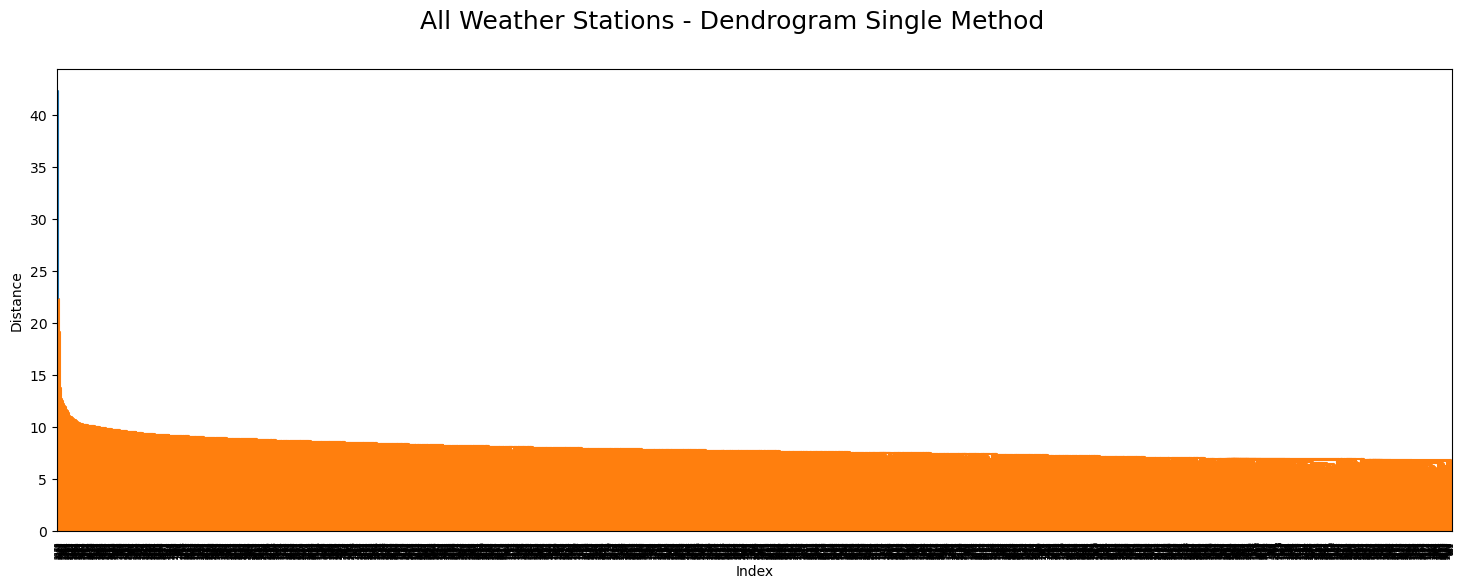

In [15]:
distance_single = linkage(dfdecade, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Single Method",fontsize=18)

### Complete method

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Complete Method')

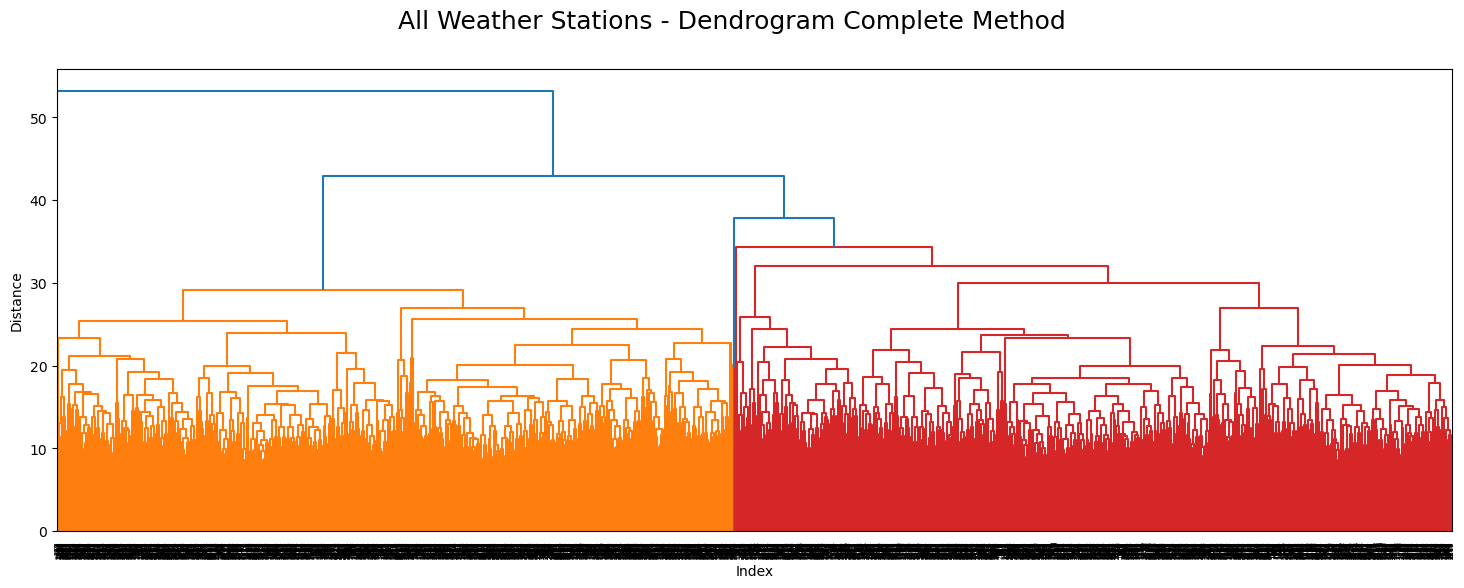

In [16]:
distance_complete = linkage(dfdecade, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Complete Method",fontsize=18)

### Average method

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Average Method')

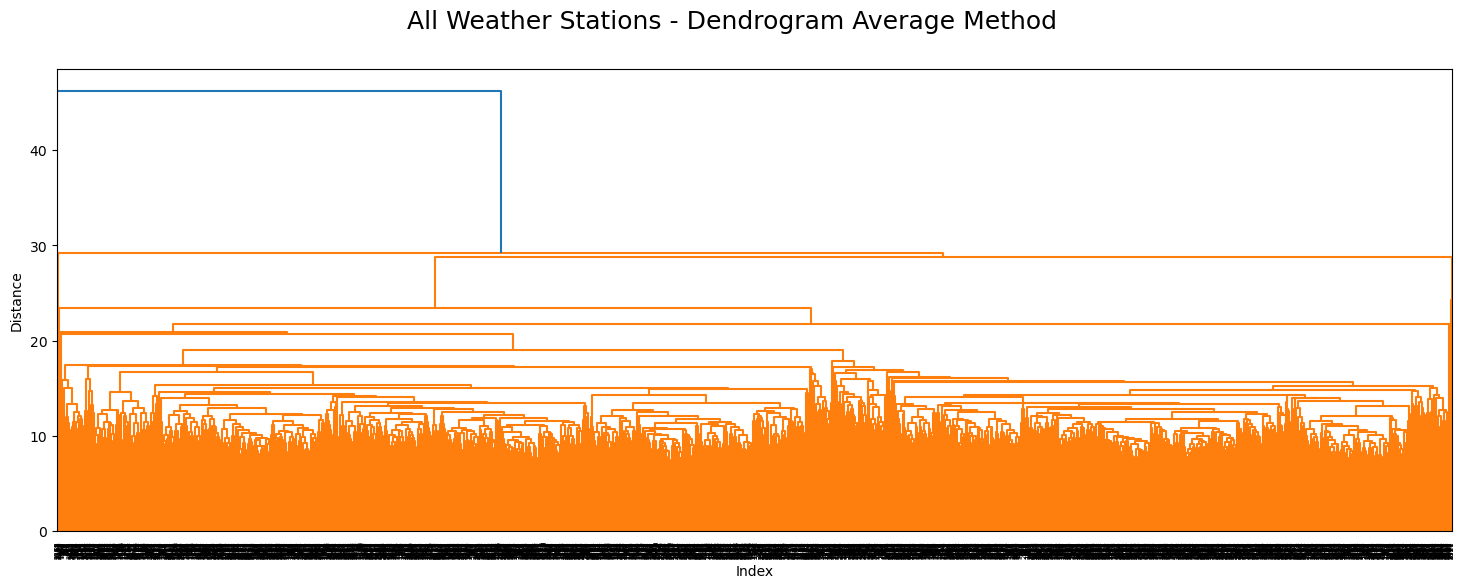

In [17]:
distance_average = linkage(dfdecade, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Average Method",fontsize=18)

### Ward method

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Ward Method')

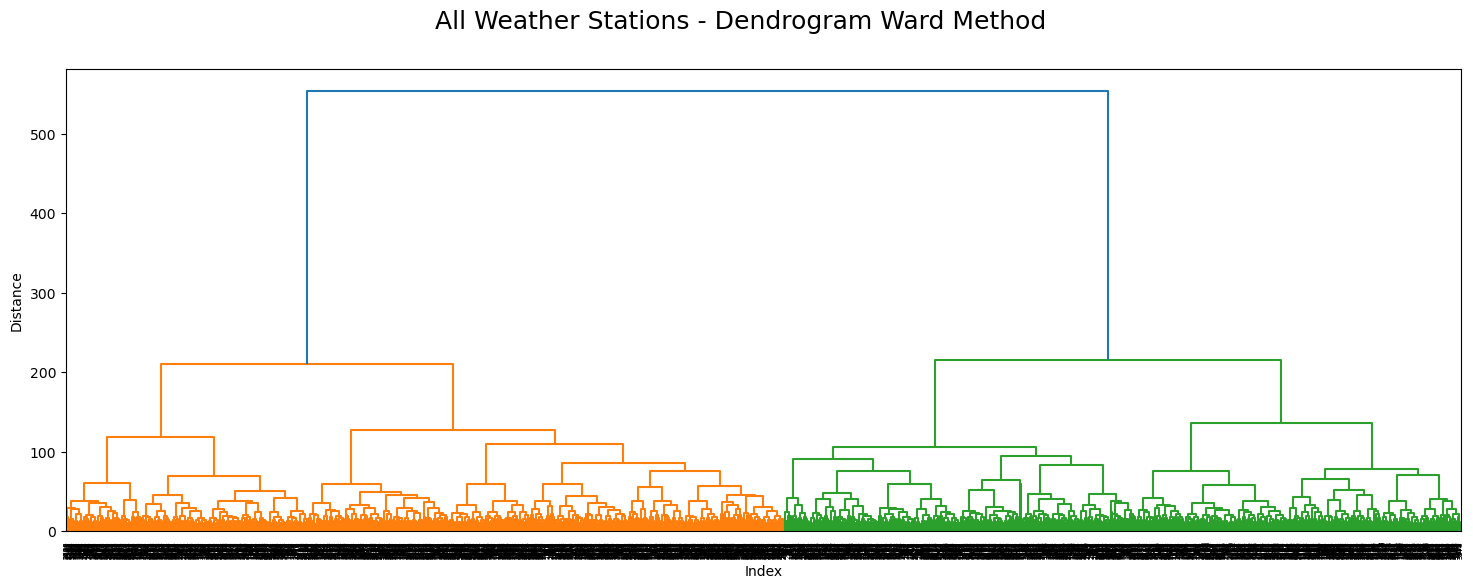

In [18]:
distance_ward = linkage(dfdecade, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Ward Method",fontsize=18)

## 04. Dimensionality reduction

#### I chose to reduce to 11 dimensions which is equal to the number of features recorded.

In [19]:
#Run the PCA model, reducing to 11 components
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(dfdecade)

In [20]:
principalComponents

array([[-1.13786535e+01,  1.66663795e+00, -4.51016858e+00, ...,
        -6.67025573e-01, -7.60595791e-01,  1.37985868e+00],
       [-1.01105506e+01,  2.55316386e+00, -5.41096435e+00, ...,
        -1.51990199e-01, -9.09292038e-01,  2.46527040e-01],
       [-9.77812134e+00,  1.37739306e+00, -4.39275180e+00, ...,
        -4.29643270e-01, -2.89739449e+00,  1.79797018e-01],
       ...,
       [-1.11074434e+01, -4.89764020e+00,  3.12166759e+00, ...,
         4.39343393e+00,  2.29116331e+00,  2.50911416e+00],
       [-1.06454730e+01, -7.56729919e+00,  2.76391632e+00, ...,
         2.63607086e+00,  1.88504781e+00,  3.58114351e-01],
       [-1.09445363e+01, -6.79379196e+00,  3.79786858e+00, ...,
        -7.63849847e-03,  2.56190939e+00, -6.12623591e-01]])

In [46]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11'])
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-11.38,1.67,-4.51,0.46,0.78,-0.71,0.63,0.41,-0.67,-0.76,1.38
1,-10.11,2.55,-5.41,0.04,-0.52,0.99,1.25,-0.28,-0.15,-0.91,0.25
2,-9.78,1.38,-4.39,-2.69,-0.72,1.72,-0.78,-1.81,-0.43,-2.90,0.18
3,-8.92,0.15,-2.79,-2.94,0.26,0.82,-0.17,-4.92,1.22,-0.50,-0.92
4,-9.18,2.92,-0.86,-1.34,-3.85,0.74,-0.66,0.13,0.67,0.12,0.45
...,...,...,...,...,...,...,...,...,...,...,...
3648,-10.85,-2.77,3.03,-0.94,-1.32,-0.00,0.74,-1.46,-2.30,-0.65,-1.31
3649,-10.10,-1.34,3.34,-1.84,-1.64,-3.15,0.52,1.45,0.52,2.40,-1.54
3650,-11.11,-4.90,3.12,-2.44,-1.67,-2.92,1.62,0.64,4.39,2.29,2.51
3651,-10.65,-7.57,2.76,-0.38,-3.53,-3.87,2.75,-0.18,2.64,1.89,0.36


## 05. Rerun dendrogram methods with reduced data

### Single Method

Text(0.5, 0.98, 'All Weatherstations - Dendrogram Single Method (PCA)')

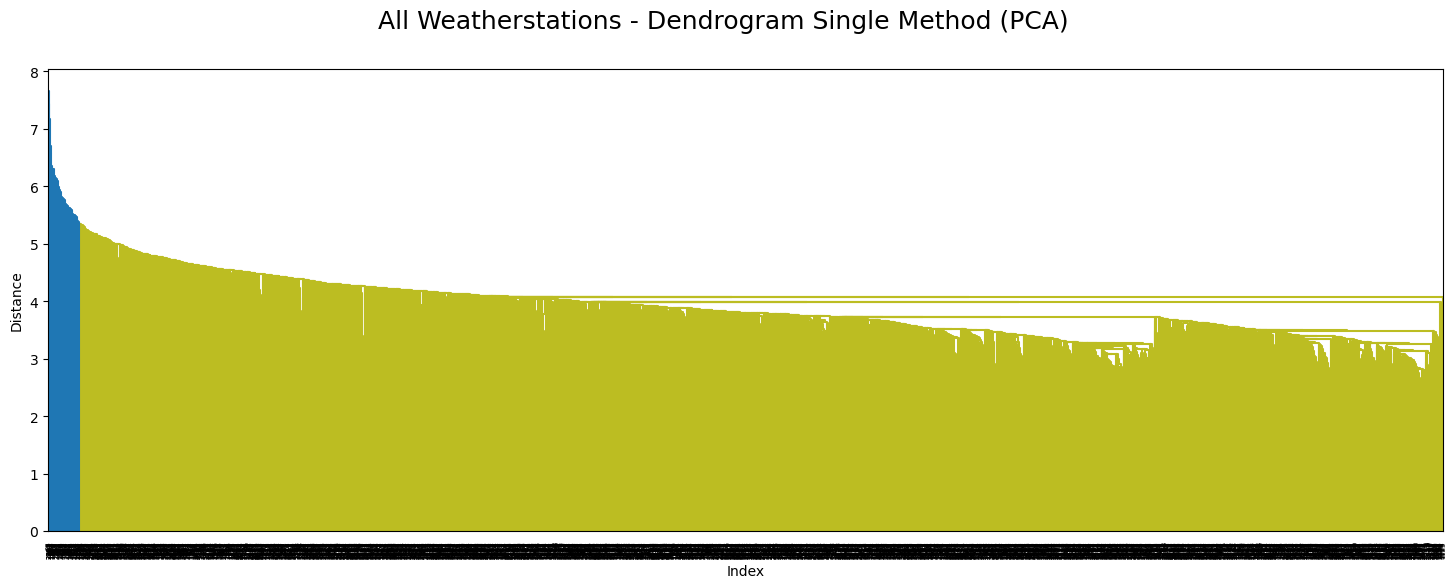

In [22]:
distance_single_pca = linkage(dfPCA, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single_pca, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Single Method (PCA)",fontsize=18)

### Complete Method

Text(0.5, 0.98, 'All Weatherstations - Dendrogram Complete Method (PCA)')

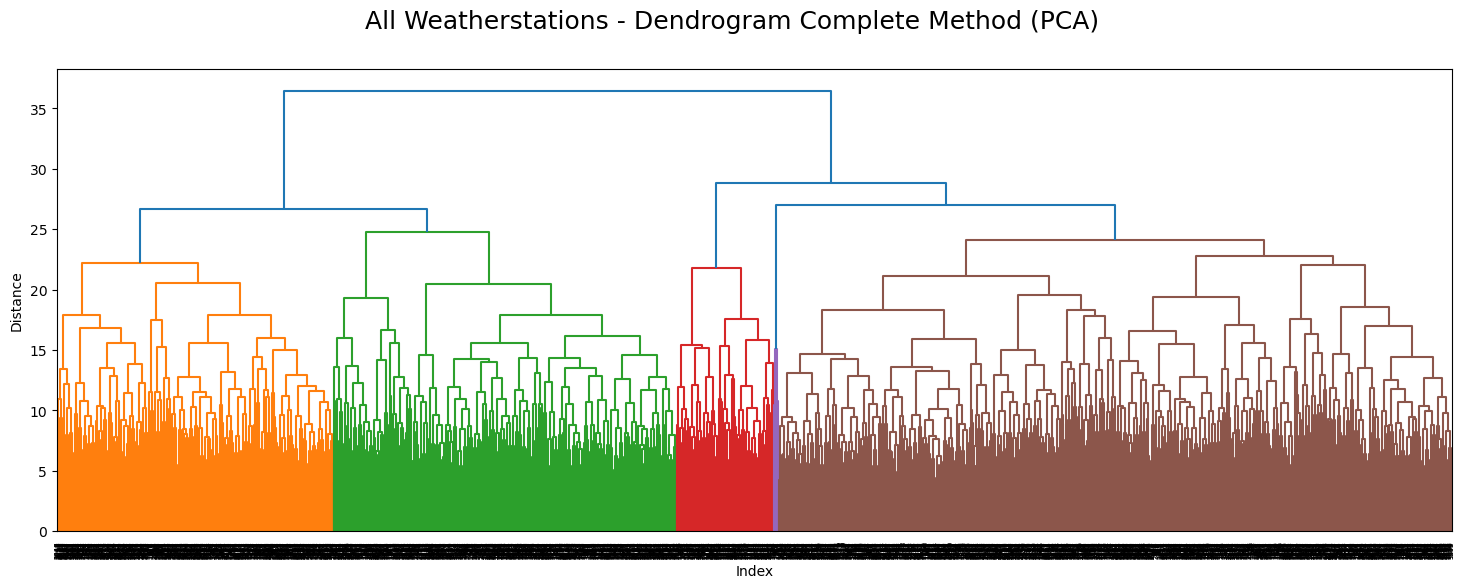

In [23]:
distance_complete_pca = linkage(dfPCA, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete_pca, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Complete Method (PCA)",fontsize=18)

### Average Method

Text(0.5, 0.98, 'All Weatherstations - Dendrogram Average Method (PCA)')

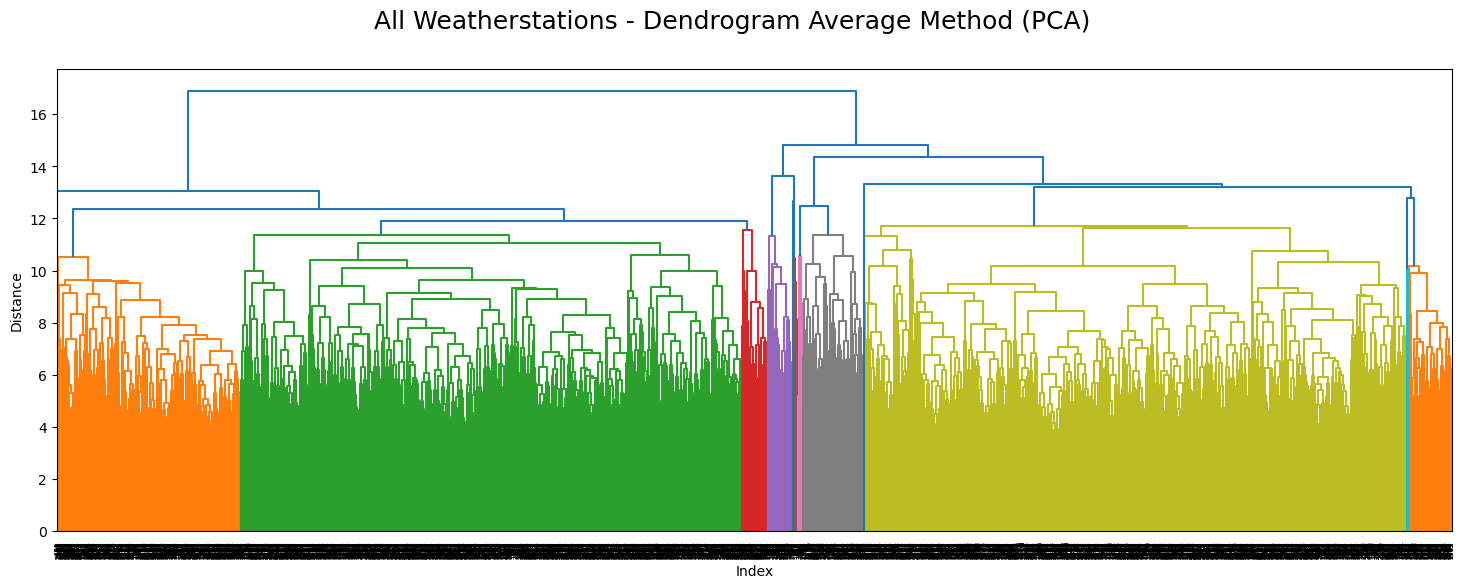

In [24]:
distance_average_pca = linkage(dfPCA, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average_pca, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Average Method (PCA)",fontsize=18)

### Ward Method

Text(0.5, 0.98, 'All Weatherstations - Dendrogram Ward Method (PCA)')

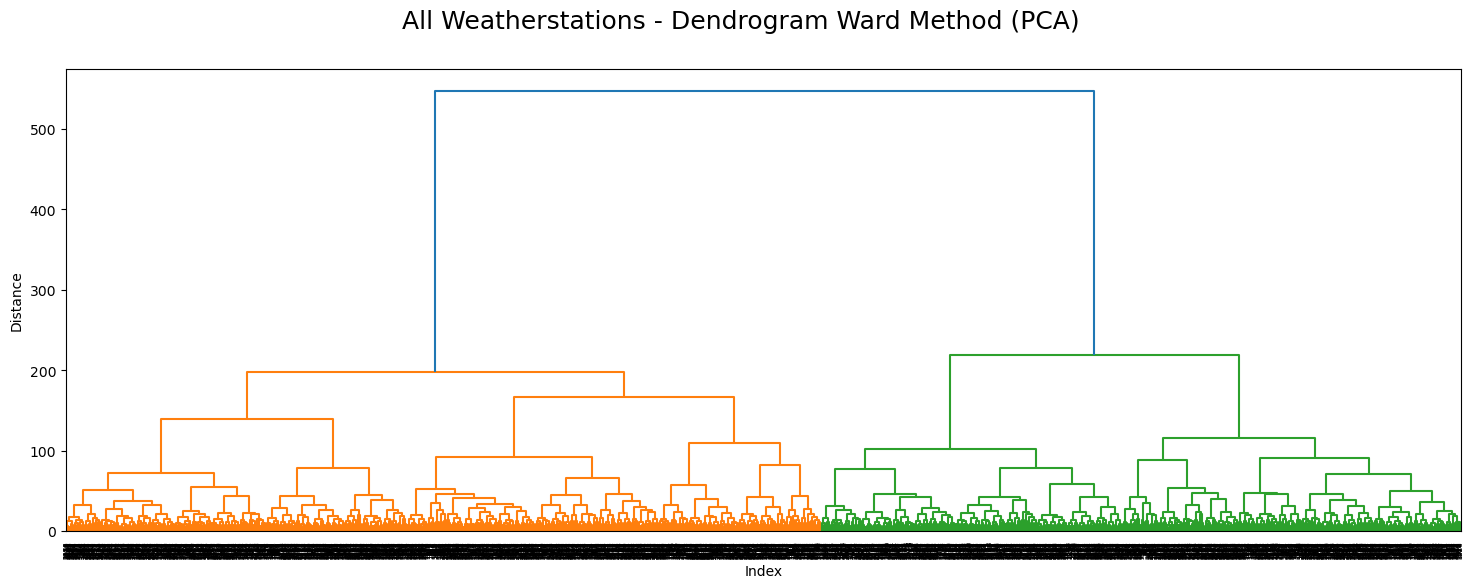

In [25]:
distance_ward = linkage(dfPCA, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Ward Method (PCA)",fontsize=18)

In [47]:
# Export the PCA dataframe
dfPCA.to_csv(os.path.join(path, '02 Data Sets', '2000s_PCA.csv'))